## Muhammad Ali Wahidiyan
## 2209106011
## A1'22

## import library yang di perlukan dan jangan lupa read

In [22]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [23]:
df=pd.read_csv('Predict_students_dropout_and_academic_success.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## data saya sudah bersih

In [24]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## mencoba cek nilai duplikat dari dataset

In [25]:
df.duplicated().sum()

0

## lakukan one hot encode pada kolom yabg akan menjadi target

## terlihat dari kolom course terpecah 17 bagian kemungkinan course ini ada 17 mata pelajaran dan scholarship holder ada 2 kemungkinan gender laki-laki atau perempuan

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categories = ["Course", "Scholarship holder"]
df_categorical = encoder.fit_transform(df[categories])
categorical = encoder.get_feature_names_out(categories)
df_categorical = pd.DataFrame(df_categorical, columns=categorical)

df_categorical.head()

,Course_1,Course_2,Course_3,Course_4,Course_5,Course_6,Course_7,Course_8,Course_9,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Course_17,Scholarship holder_0,Scholarship holder_1
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## langsung saya satukan saja pada dataset

In [49]:
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Course_10,Course_11,Course_12,Course_13,Course_14,Course_15,Course_16,Course_17,Scholarship holder_0,Scholarship holder_1
0,1,8,5,2,1,1,1,13,10,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,6,1,11,1,1,1,1,3,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,5,5,1,1,1,22,27,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,8,2,15,1,1,1,23,27,6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2,12,1,3,0,1,1,22,28,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## kemudian saya memilih fitur X dan juga Y sebagai targetnya

In [101]:
X = df['Course_7'] 
y = df['Scholarship holder_1']

## dan saya split datanya untuk di latih dan di test dengan size 20%

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## disini saya akan membuat model dnn nya menggunakan sequential model dengan beberapa layer serta model compilenya menggunakan optimizer adam loss nya binary dan metrics accuracy

In [97]:
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=[1]),
    layers.Dense(50, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## kemudian kita akan melakukan pelatihan pada model dengan model fit

In [98]:
hist=model.fit(X_train,y_train, epochs=100 ,validation_split =0.2,batch_size=32)

Epoch 1/100
89/89 [==============================] - 1s 4ms/step - loss: 0.6210 - accuracy: 0.7354 - val_loss: 0.5577 - val_accuracy: 0.7528
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7446 - val_loss: 0.5578 - val_accuracy: 0.7528
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7446 - val_loss: 0.5575 - val_accuracy: 0.7528
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7446 - val_loss: 0.5581 - val_accuracy: 0.7528
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7446 - val_loss: 0.5609 - val_accuracy: 0.7528
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.7446 - val_loss: 0.5575 - val_accuracy: 0.7528
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7446 - val_loss: 0.5599 - val_accuracy: 0.7528
Epoch 8/100
8

Epoch 59/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7446 - val_loss: 0.5583 - val_accuracy: 0.7528
Epoch 60/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7446 - val_loss: 0.5584 - val_accuracy: 0.7528
Epoch 61/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7446 - val_loss: 0.5577 - val_accuracy: 0.7528
Epoch 62/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7446 - val_loss: 0.5574 - val_accuracy: 0.7528
Epoch 63/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7446 - val_loss: 0.5582 - val_accuracy: 0.7528
Epoch 64/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7446 - val_loss: 0.5589 - val_accuracy: 0.7528
Epoch 65/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7446 - val_loss: 0.5576 - val_accuracy: 0.7528
Epoch 

In [106]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

accuracy = accuracy_score(y_test, y_pred_classes)
print("Akurasi:", accuracy)


28/28 [==============================] - 0s 2ms/step
Akurasi: 0.7728813559322034


## lakukan evaluasi model prediksi berdasarkan hasil yaitu 0.77 atau 77% hasil yang cukup dari akurasi model tersebut

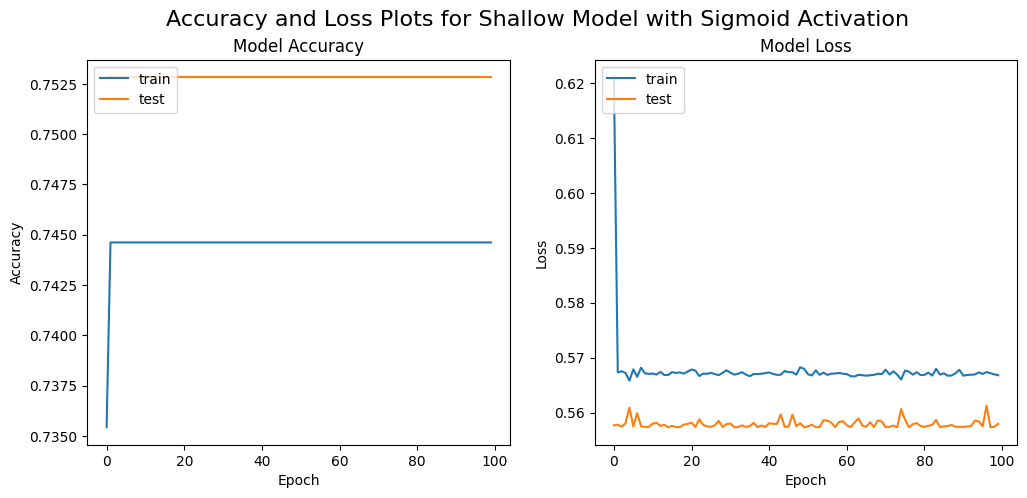

In [99]:
import matplotlib.pyplot as plt
def plot_acc_loss(history, model_name):
    # Plot the accuracy and loss graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')

    fig.suptitle(f"Accuracy and Loss Plots for {model_name}", fontsize=16)
    plt.show()

plot_acc_loss(hist, "Shallow Model with Sigmoid Activation")

## dan di sini kita menampilkan plot berdasarkan dua model yaitu model accuracy dan model loss
## *model accuracy:
## -train: dari 0.7350 kemudian baik sangat stabil di angka 0.7450
## -test:sangat stabil diangka 0.7525 keatas

## *model loss:
## -train:berawal dari 0.62 dan berakhir turun cukup stabil di sekitaran 0.57
## -test:cukup stabil diangka 0.56

int64
